# Résumé du projet : Prédiction du cancer du sein à l’aide du machine learning



## Introduction : L’impact du cancer du sein dans le monde

Le cancer du sein est l’un des cancers les plus répandus dans le monde, touchant des millions de femmes chaque année. Selon l’OMS, il représente la première cause de décès par cancer chez les femmes à l’échelle mondiale. La détection joue un rôle crucial dans l’amélioration des chances de guérison et la réduction de la mortalité. Malheureusement, dans de nombreux pays, le diagnostic arrive souvent tardivement, ce qui limite les options de traitement.

⸻

## Objectif du projet

Face à cette réalité, j’ai décidé de travailler sur un projet de prédiction du type de tumeur du sein (maligne ou bénigne) à l’aide de techniques de machine learning. Ce choix est motivé par l’importance réelle du sujet en santé publique, et le potentiel de l’intelligence artificielle à soutenir les professionnels de santé dans le diagnostic précoce.

⸻

## Préparation et nettoyage des données

Les données utilisées proviennent d’un jeu de données public, contenant des caractéristiques extraites d’images médicales de cellules mammaires. Le dataset étant peu volumineux, il était important de ne pas perdre d’observations lors du nettoyage. J’ai donc :
	•	identifié et traité les valeurs aberrantes en les remplaçant par des valeurs seuils plutôt que de les supprimer.
	•	vérifié les valeurs manquantes.
	•	normalisé les données  pour certains modèles (comme la Regression Logistique, le KNN ou le SVM).

⸻

## Modèles de machine learning utilisés

J’ai testé plusieurs algorithmes de classification :
	•	Régression logistique
	•	K-Nearest Neighbors (KNN)
	•	Support Vector Machine (SVM)
	•	Arbre de décision (Decision Tree)

Chaque modèle a été entraîné sur les mêmes données, puis évalué à l’aide de la métrique accuracy_score, entre autres.

# À propos de l'ensemble de données

Les caractéristiques sont calculées à partir d'une image numérisée d'une ponction à l'aiguille fine (PAF) d'une masse mammaire. Elles décrivent les caractéristiques des noyaux cellulaires présents sur l'image.
L'espace tridimensionnel est celui décrit dans : [KP Bennett et OL Mangasarian : « Robust Linear Programming Discrimination of Two Linearly Inseparable Sets », Optimization Methods and Software 1, 1992, p. 23-34].

Cette base de données est également disponible via le serveur ftp UW CS :
ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

Peut également être trouvé sur le référentiel d'apprentissage automatique de l'UCI : https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Informations sur les attributs :

1) Numéro d'identification
2) Diagnostic :
   - M (malignes) : Cancéreuse
   - B (bénignes) : Pas cancéreuse


Dix caractéristiques à valeur réelle sont calculées pour chaque noyau cellulaire :

a) radius_mean  (moyenne des distances du centre aux points du périmètre)

b) texture_mean (écart type des valeurs de niveaux de gris)

c) perimeter_mean (taille moyenne de la tumeur centrale)

d) smoothness_mean (surface moyenne)

e) compactness_mean (variation locale des longueurs de rayon)

f) concavity_mean (périmètre^2 / aire - 1,0)

g) concavity_worst (gravité des parties concaves du contour)

h) concave points_worst (nombre de parties concaves du contour)

i) symmetry_worst

j) fractal_dimension_worst (« approximation de la ligne de côte » - 1)


La moyenne, l'erreur type et la valeur la plus élevée (moyenne des trois plus grandes valeurs) de ces caractéristiques ont été calculées pour chaque image, ce qui a donné lieu à 30 caractéristiques. Par exemple, le champ 3 correspond au rayon moyen, le champ 13 au rayon SE et le champ 23 au pire rayon.

Toutes les valeurs de caractéristiques sont enregistrées avec quatre chiffres significatifs.


Répartition des classes : 357 bénignes, 212 malignes

In [1]:
#importation des bibliotheques

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from  sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [2]:
# importation de nos données

df = pd.read_csv('Dataset_Cancer_Du_Sein.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [62]:
#information sur nos données

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [63]:
#voir les statistiques descriptives

df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [64]:
#verification des valeurs manquantes

df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [3]:
#Sppression de la colonne Unnamed: 32

df = df.drop(columns=['id','Unnamed: 32'], axis=1)

In [4]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


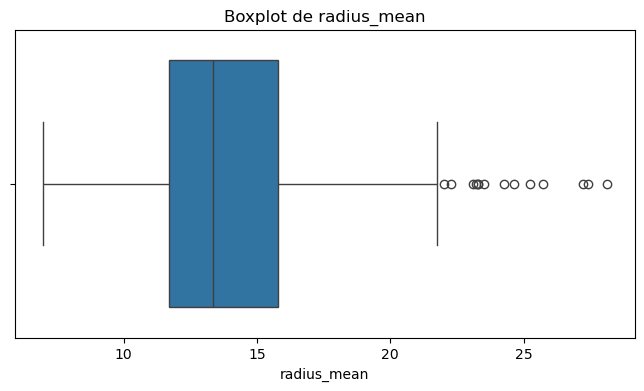

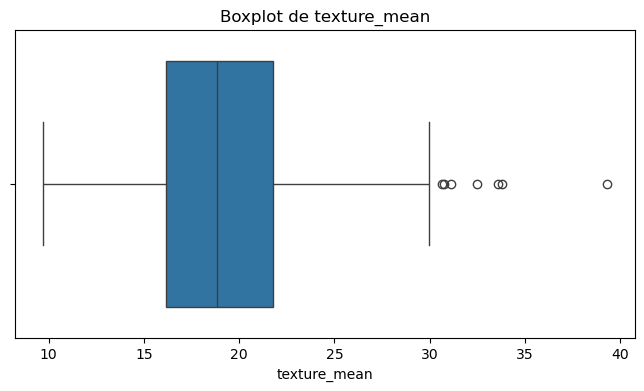

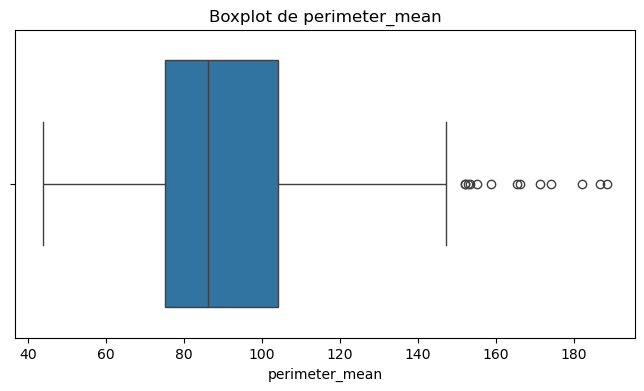

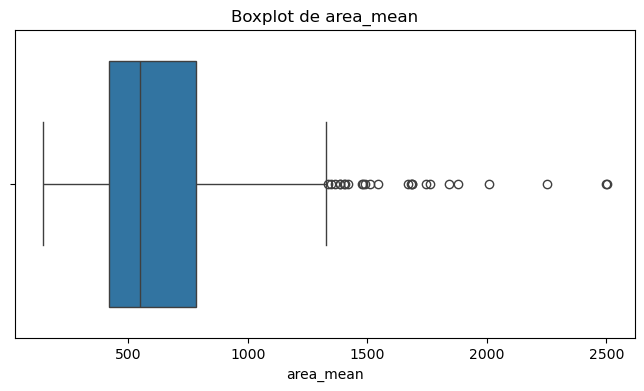

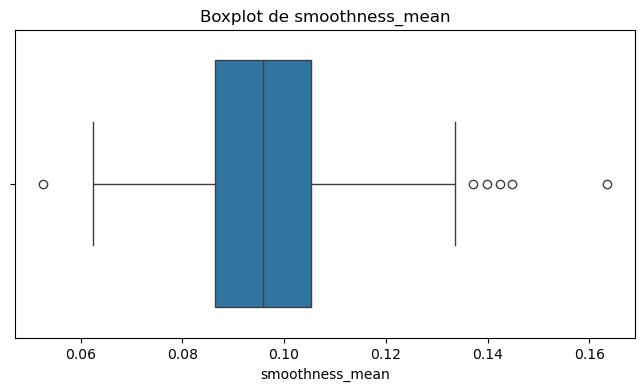

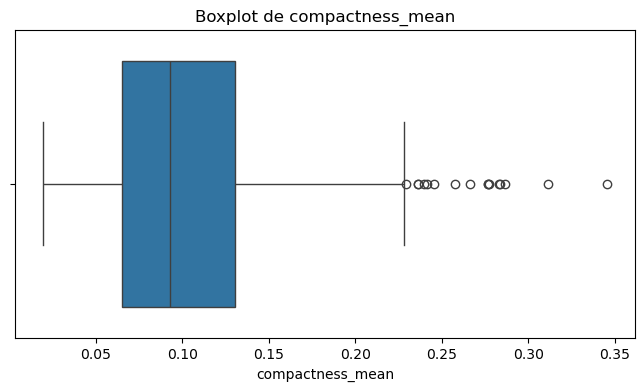

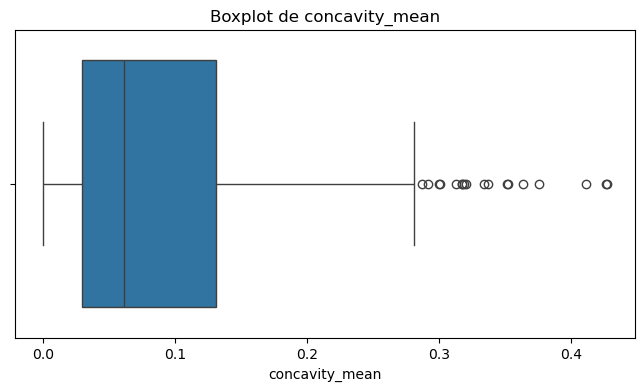

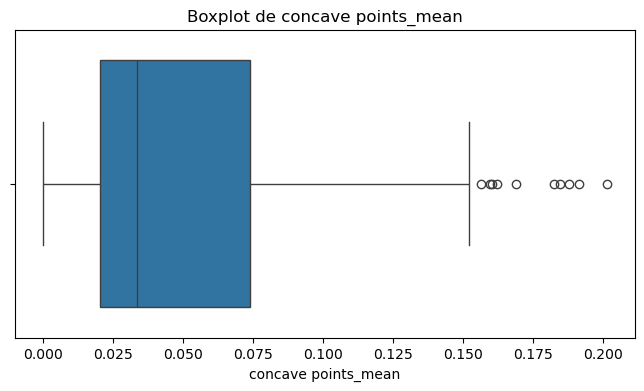

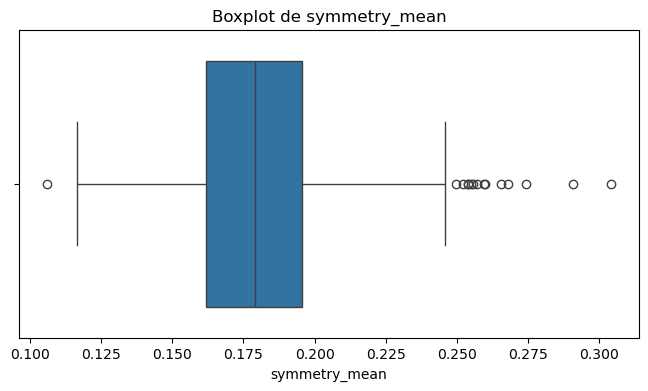

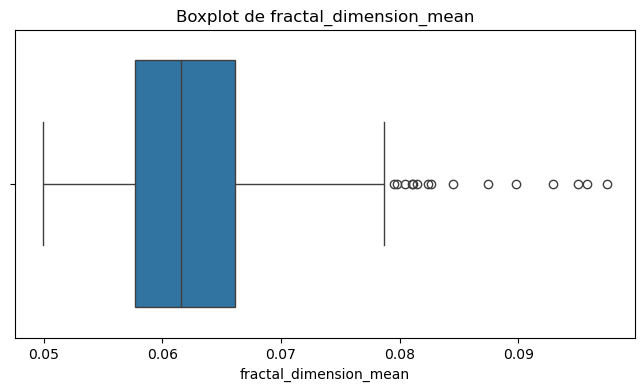

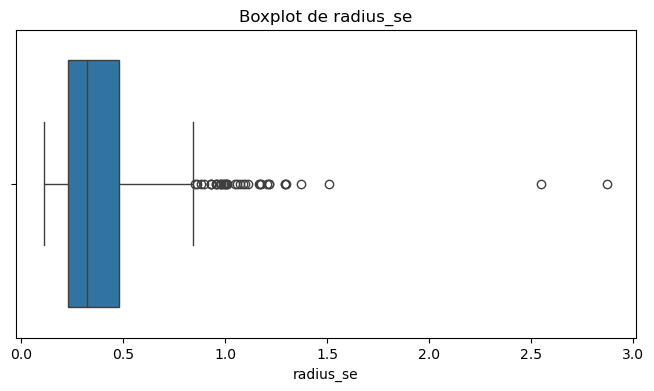

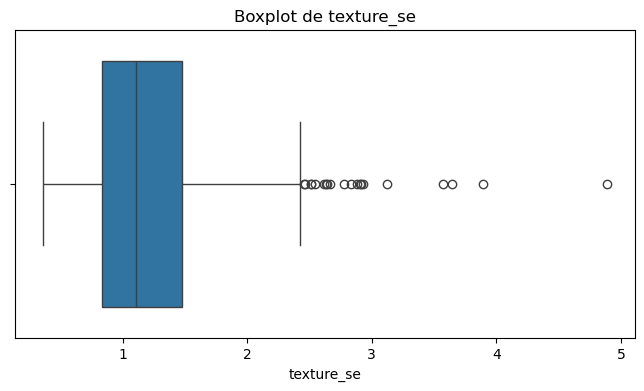

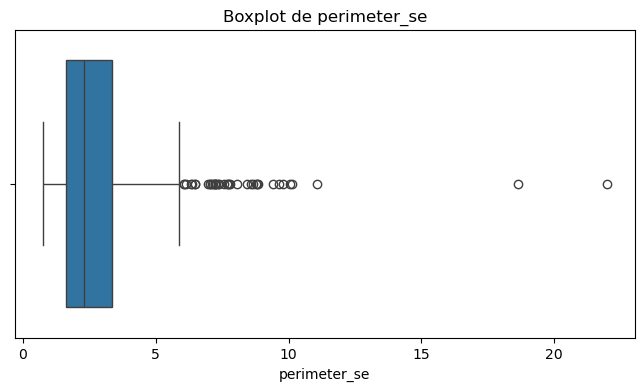

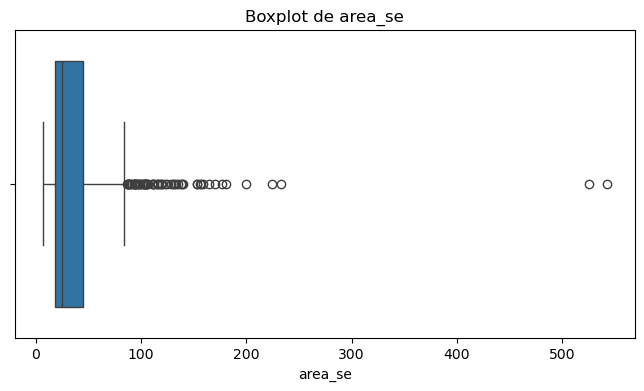

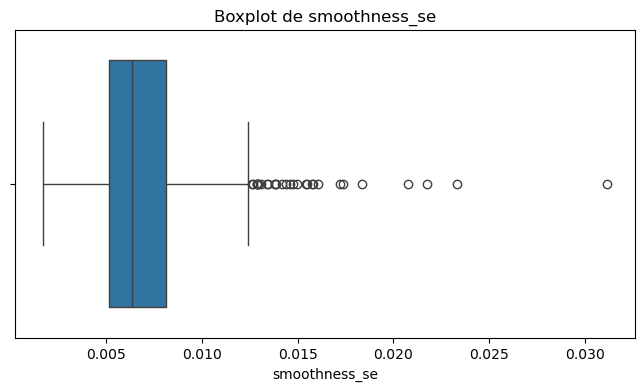

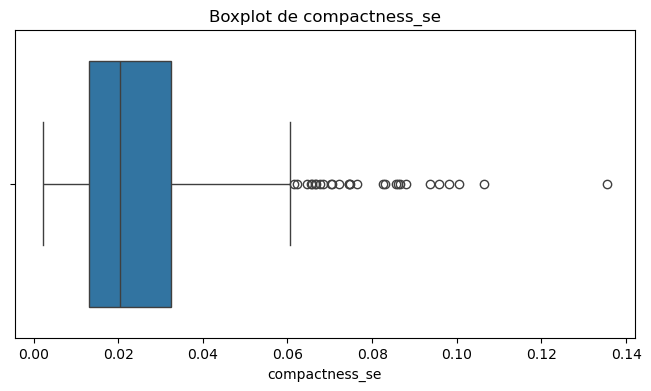

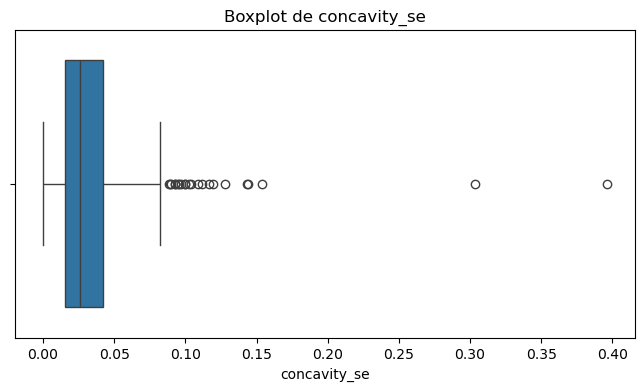

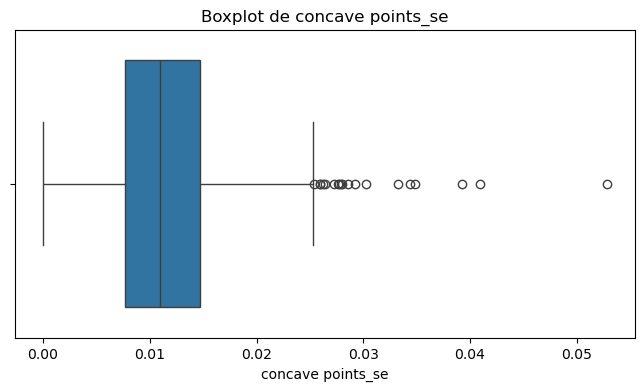

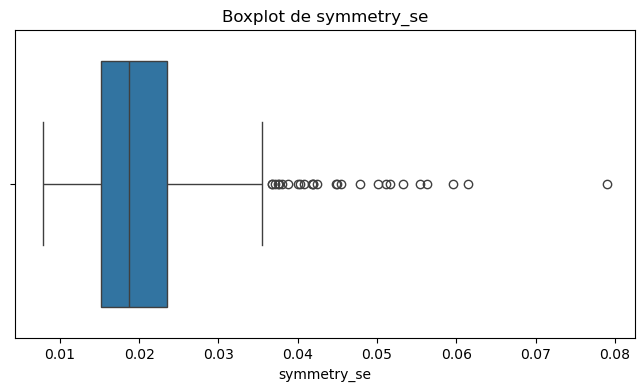

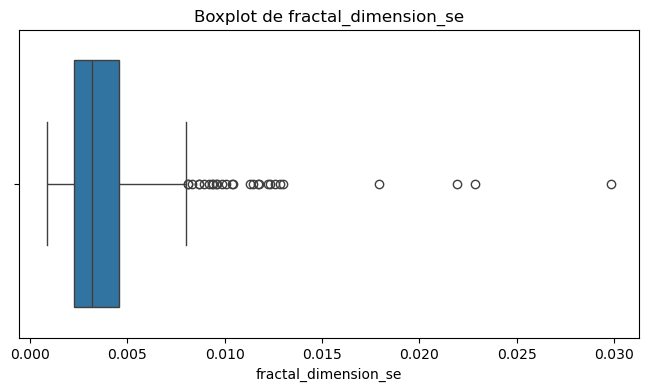

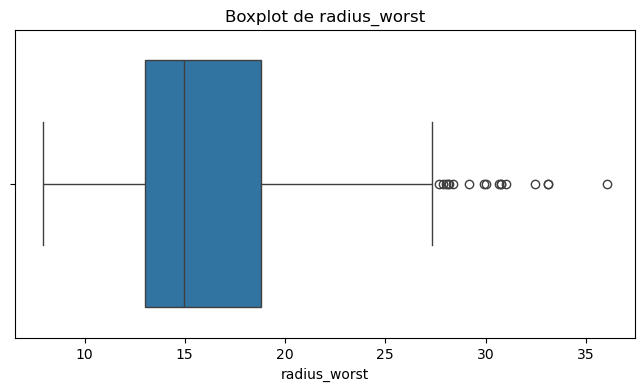

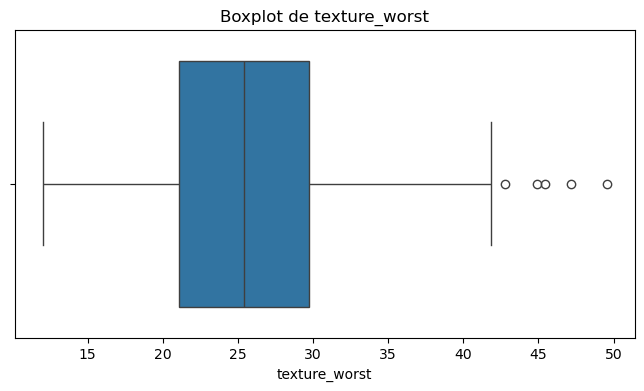

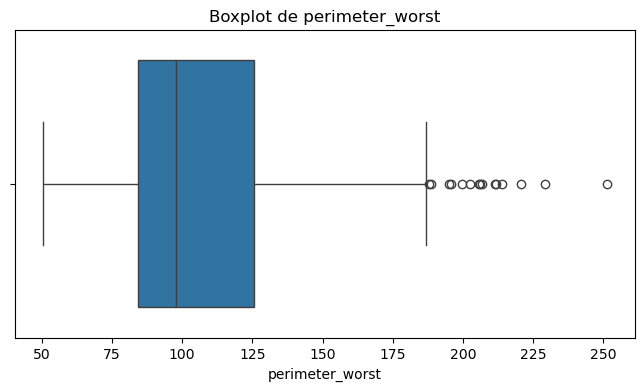

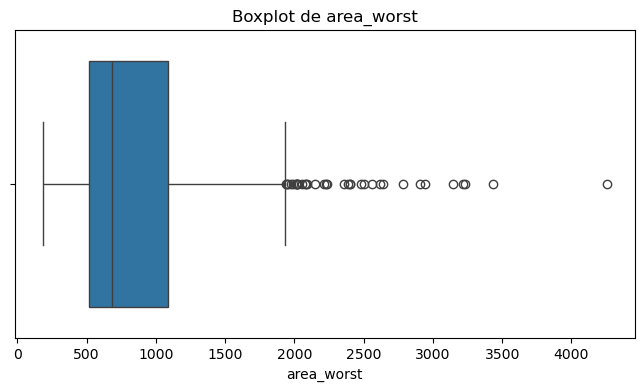

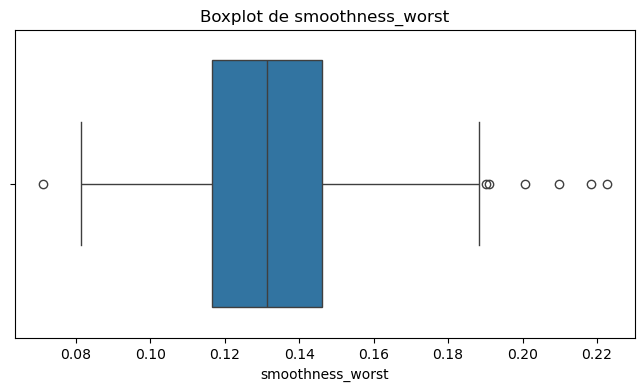

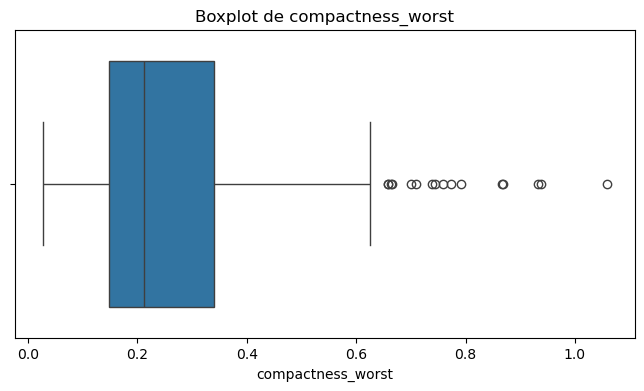

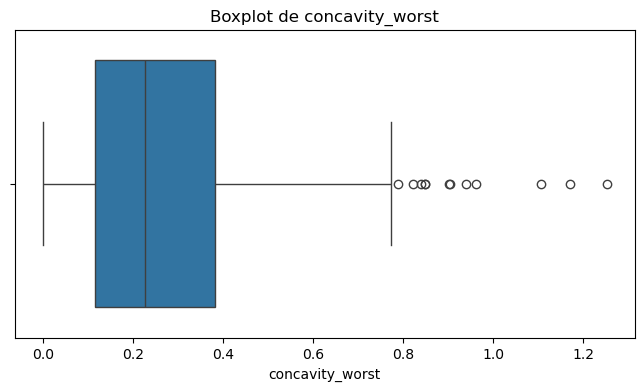

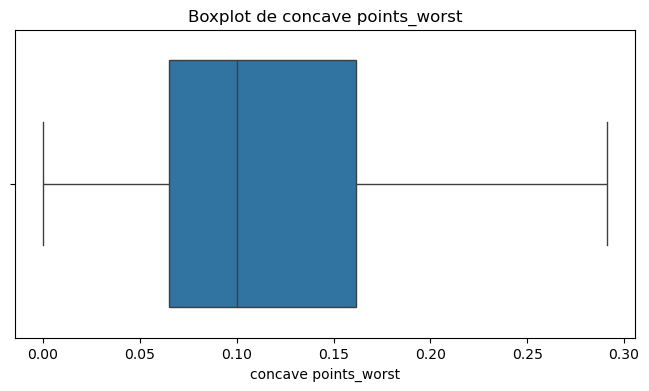

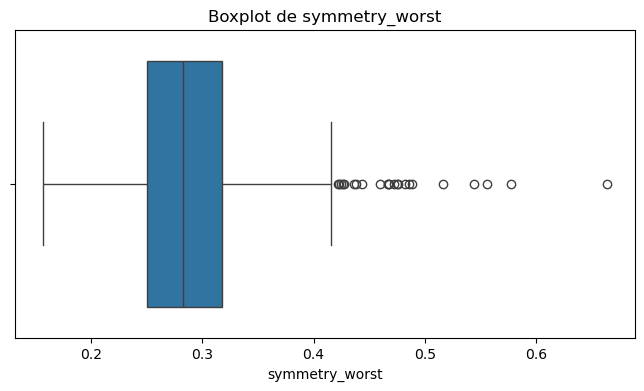

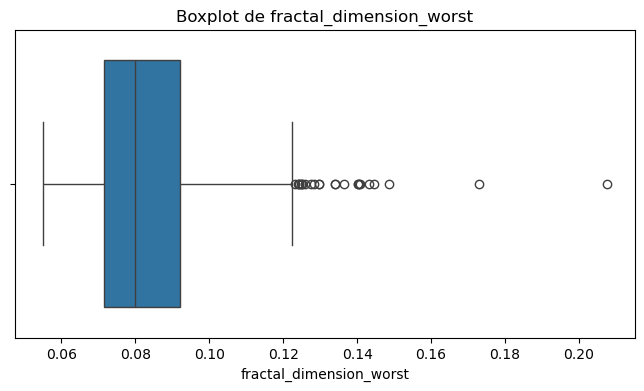

In [4]:
#Boxplot de nos valeurs aberrantes

colonnes_numeriques = df.select_dtypes(include='number').columns


for col in colonnes_numeriques :
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot de {col}")
    plt.show()



In [5]:
#verification en chiffres des valeurs aberrantes

def aberrante(df, colonne) : 
    Q1 = df[colonne].quantile(0.25)
    Q3 = df[colonne].quantile(0.75)
    IQR = Q3 - Q1 
    borne_inf = Q1 - 1.5 * IQR
    borne_sup = Q3 + 1.5 * IQR 
    outliers = df[(df[colonne] < borne_inf) | (df[colonne] > borne_sup)]
    return outliers

for col in colonnes_numeriques :
    outliers = aberrante(df, col)
    print(f"{col} - Nombre de valeurs aberrantes : {len(outliers)}")

radius_mean - Nombre de valeurs aberrantes : 14
texture_mean - Nombre de valeurs aberrantes : 7
perimeter_mean - Nombre de valeurs aberrantes : 13
area_mean - Nombre de valeurs aberrantes : 25
smoothness_mean - Nombre de valeurs aberrantes : 6
compactness_mean - Nombre de valeurs aberrantes : 16
concavity_mean - Nombre de valeurs aberrantes : 18
concave points_mean - Nombre de valeurs aberrantes : 10
symmetry_mean - Nombre de valeurs aberrantes : 15
fractal_dimension_mean - Nombre de valeurs aberrantes : 15
radius_se - Nombre de valeurs aberrantes : 38
texture_se - Nombre de valeurs aberrantes : 20
perimeter_se - Nombre de valeurs aberrantes : 38
area_se - Nombre de valeurs aberrantes : 65
smoothness_se - Nombre de valeurs aberrantes : 30
compactness_se - Nombre de valeurs aberrantes : 28
concavity_se - Nombre de valeurs aberrantes : 22
concave points_se - Nombre de valeurs aberrantes : 19
symmetry_se - Nombre de valeurs aberrantes : 27
fractal_dimension_se - Nombre de valeurs aberrant

In [6]:
#Pour les valeurs aberrantes, nous allons remplacer par les valeurs seuils car notre dataset n'est pas volumineux. Les supprimées risqueraientt de compromettre un peu nos modeles

for col in colonnes_numeriques:
   Q1 = df[col].quantile(0.25)
   Q3 = df[col].quantile(0.75)
   IQR = Q3 - Q1
   borne_inf = Q1 - 1.5 * IQR
   borne_sup = Q3 + 1.5 * IQR
   df[col] = np.where(df[col] < borne_inf, borne_inf, np.where(df[col] > borne_sup, borne_sup, df[col]))

In [10]:
#nouvelle verification en chiffres des valeurs aberrantes

def aberrante(df, colonne) : 
    Q1 = df[colonne].quantile(0.25)
    Q3 = df[colonne].quantile(0.75)
    IQR = Q3 - Q1 
    borne_inf = Q1 - 1.5 * IQR
    borne_sup = Q3 + 1.5 * IQR 
    outliers = df[(df[colonne] < borne_inf) | (df[colonne] > borne_sup)]
    return outliers

for col in colonnes_numeriques :
    outliers = aberrante(df, col)
    print(f"{col} - Nombre de valeurs aberrantes : {len(outliers)}")

radius_mean - Nombre de valeurs aberrantes : 0
texture_mean - Nombre de valeurs aberrantes : 0
perimeter_mean - Nombre de valeurs aberrantes : 0
area_mean - Nombre de valeurs aberrantes : 0
smoothness_mean - Nombre de valeurs aberrantes : 0
compactness_mean - Nombre de valeurs aberrantes : 0
concavity_mean - Nombre de valeurs aberrantes : 0
concave points_mean - Nombre de valeurs aberrantes : 0
symmetry_mean - Nombre de valeurs aberrantes : 0
fractal_dimension_mean - Nombre de valeurs aberrantes : 0
radius_se - Nombre de valeurs aberrantes : 0
texture_se - Nombre de valeurs aberrantes : 0
perimeter_se - Nombre de valeurs aberrantes : 0
area_se - Nombre de valeurs aberrantes : 0
smoothness_se - Nombre de valeurs aberrantes : 0
compactness_se - Nombre de valeurs aberrantes : 0
concavity_se - Nombre de valeurs aberrantes : 0
concave points_se - Nombre de valeurs aberrantes : 0
symmetry_se - Nombre de valeurs aberrantes : 0
fractal_dimension_se - Nombre de valeurs aberrantes : 0
radius_wor

In [22]:
#verifions les doublons

df.duplicated().sum()

0

C:\Users\WINDOWS 10 VPRO\AppData\Local\Temp\ipykernel_7912\1090129795.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='diagnosis', y='perimeter_mean', palette='pastel')


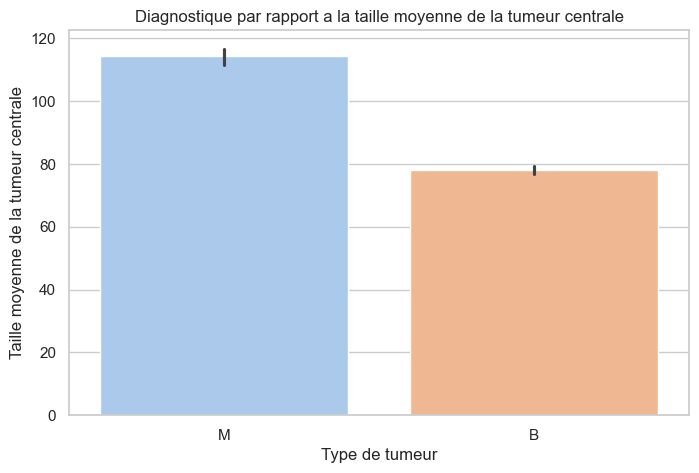

In [7]:
# diagramme en barre montrant le Diagnostique par rapport a la taille moyenne de la tumeur centrale

sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))

sns.barplot(data=df, x='diagnosis', y='perimeter_mean', palette='pastel')

plt.title("Diagnostique par rapport a la taille moyenne de la tumeur centrale")
plt.xlabel("Type de tumeur")
plt.ylabel("Taille moyenne de la tumeur centrale")
plt.show()

C:\Users\WINDOWS 10 VPRO\AppData\Local\Temp\ipykernel_7912\1211830585.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='diagnosis', palette={'M': 'grey', 'B': 'salmon'})


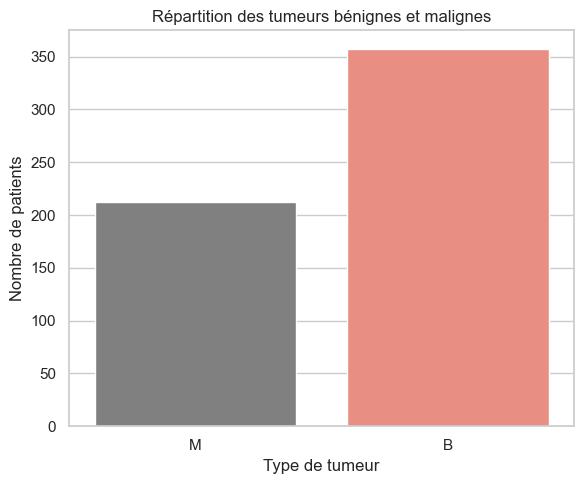

In [8]:
#diagramme de la Répartition des tumeurs bénignes et malignes

plt.figure(figsize=(6, 5))
sns.countplot(data=df, x='diagnosis', palette={'M': 'grey', 'B': 'salmon'})

plt.title("Répartition des tumeurs bénignes et malignes")
plt.xlabel("Type de tumeur")
plt.ylabel("Nombre de patients")
plt.tight_layout()
plt.show()

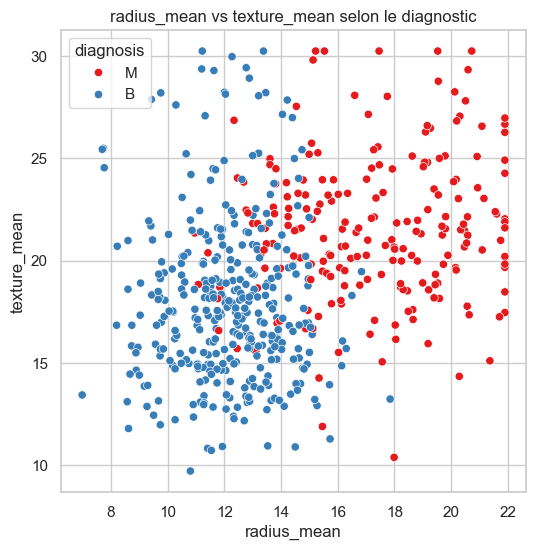

In [12]:
# Scatterplot entre deux variables clés

plt.figure(figsize=(6,6))
sns.scatterplot(data=df, x='radius_mean', y='texture_mean', hue='diagnosis', palette='Set1')
plt.title("radius_mean vs texture_mean selon le diagnostic")
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")
plt.show()


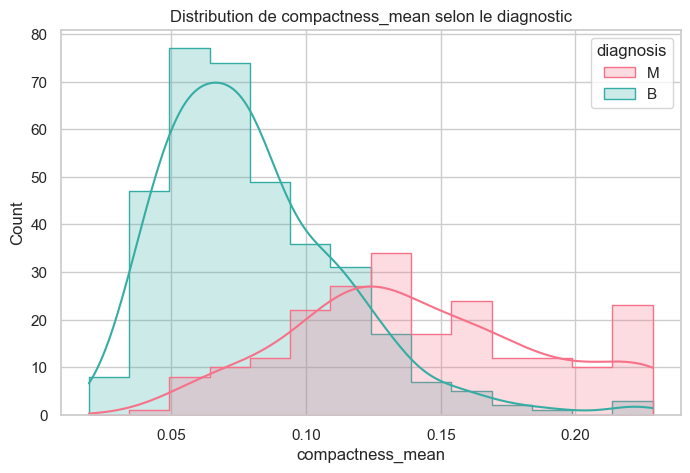

In [13]:
# Distribution de compactness_mean selon le diagnostic

plt.figure(figsize=(8,5))
sns.histplot(data=df, x='compactness_mean', hue='diagnosis', kde=True, element="step", palette="husl")
plt.title("Distribution de compactness_mean selon le diagnostic")
plt.show()

In [38]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
40,M,13.44,21.58,86.18,563.0,0.08162,0.06031,0.03110,0.02031,0.1784,...,15.93,30.25,102.50,787.9,0.1094,0.20430,0.20850,0.11120,0.2994,0.07146
48,B,12.05,14.63,78.04,449.3,0.10310,0.09092,0.06592,0.02749,0.1675,...,13.76,20.70,89.88,582.6,0.1494,0.21560,0.30500,0.06548,0.2747,0.08301
49,B,13.49,22.30,86.91,561.0,0.08752,0.07698,0.04751,0.03384,0.1809,...,15.15,31.82,99.00,698.8,0.1162,0.17110,0.22820,0.12820,0.2871,0.06917
51,B,13.64,16.34,87.21,571.8,0.07685,0.06059,0.01857,0.01723,0.1353,...,14.67,23.19,96.08,656.7,0.1089,0.15820,0.10500,0.08586,0.2346,0.08025
52,B,11.94,18.24,75.71,437.6,0.08261,0.04751,0.01972,0.01349,0.1868,...,13.10,21.33,83.67,527.2,0.1144,0.08906,0.09203,0.06296,0.2785,0.07408


In [12]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [14]:
# encodage de nos données categorielle

df['diagnosis'] = df['diagnosis'].replace({'M': 1, 'B': 0})

C:\Users\WINDOWS 10 VPRO\AppData\Local\Temp\ipykernel_7912\1921551492.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['diagnosis'] = df['diagnosis'].replace({'M': 1, 'B': 0})


In [14]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.118400,0.22862,0.28241,0.14710,0.2419,...,25.38,17.33,184.60,1937.05,0.1622,0.62695,0.7119,0.2654,0.41915,0.11890
1,1,20.57,17.77,132.90,1326.0,0.084740,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1937.05,0.1238,0.18660,0.2416,0.1860,0.27500,0.08902
2,1,19.69,21.25,130.00,1203.0,0.109600,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.00,0.1444,0.42450,0.4504,0.2430,0.36130,0.08758
3,1,11.42,20.38,77.58,386.1,0.133695,0.22862,0.24140,0.10520,0.2464,...,14.91,26.50,98.87,567.70,0.1901,0.62695,0.6869,0.2575,0.41915,0.12301
4,1,20.29,14.34,135.10,1297.0,0.100300,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.00,0.1374,0.20500,0.4000,0.1625,0.23640,0.07678


In [15]:
#normalisation 

colonnes_a_normaliser = [colonnes_numeriques]

#initialisation du normaliseur

scaler = MinMaxScaler()

#appliquer la normalisattion 

df[colonnes_numeriques] = scaler.fit_transform(df[colonnes_numeriques])

In [16]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,0.737918,0.032627,0.761873,0.724975,0.798006,1.000000,1.000000,0.951888,0.966716,...,0.893497,0.173190,0.980026,1.000000,0.762755,1.000000,0.906302,0.912027,1.000000,0.939532
1,1,0.910852,0.392501,0.859264,0.999746,0.353473,0.283215,0.307709,0.454072,0.517751,...,0.873528,0.371494,0.791601,1.000000,0.436224,0.265667,0.307575,0.639175,0.451171,0.499926
2,1,0.851867,0.561967,0.831300,0.895756,0.681788,0.671573,0.698984,0.827644,0.707840,...,0.800819,0.440639,0.745591,0.869823,0.611395,0.662392,0.573393,0.835052,0.779745,0.478741
3,1,0.297540,0.519601,0.325828,0.205107,1.000000,1.000000,0.854786,0.680752,1.000000,...,0.357399,0.472277,0.353916,0.218341,1.000000,1.000000,0.874475,0.884880,1.000000,1.000000
4,1,0.892084,0.225469,0.880478,0.975228,0.558967,0.542057,0.701108,0.674928,0.515533,...,0.748080,0.151663,0.743400,0.793333,0.551871,0.296351,0.509230,0.558419,0.304207,0.319847


# Modele de Regression Logistique

In [16]:
#separation des features et du label

X = df.drop(columns='diagnosis', axis=1)
y = df['diagnosis']

In [17]:
#Etape 2 : Separation en jeu d'entrainement et jeu de test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
#creation et entrainement du modele

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [19]:
#faire la prediction

y_pred = model.predict(X_test)

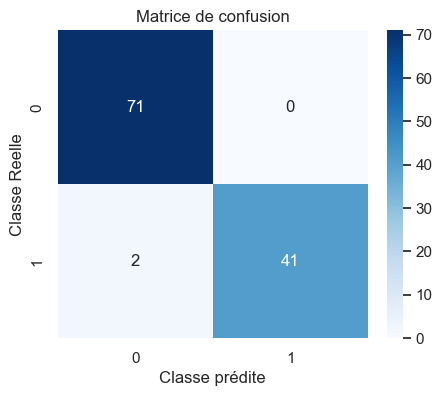

In [48]:
#matrice de confusion

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues') 
plt.title('Matrice de confusion')
plt.xlabel("Classe prédite")
plt.ylabel('Classe Reelle')
plt.show()

## classe 0 (benigne)

- 71 vrais négatifs (TN) : le modèle a bien prédit 71 fois bénigne alors que c’était vraiment bénigne.
- 2 faux négatifs (FN) : le modèle a prédit 2 fois bénigne, alors que c’était maligne.

## Classe 1 (maligne)

- 41 vrais positifs (TP) : le modèle a bien prédit 41 fois maligne alors que c’était vraiment maligne.
- 0 faux positifs (FP) : le modèle a prédit O fois maligne, alors que c’était bénigne.


In [21]:
#Rapport de classification

print("\n Rapport de classification : \n", classification_report(y_test, y_pred))


 Rapport de classification : 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



## Classe 0 (bénigne)

- Précision 0.97 :  97% des cas prédits comme bénignes sont effectivement bénignes.
- Rappel 1.00 : 100% des cas réellement bénins ont été correctement identifiés.
- Très bon équilibre entre les deux.

## Classe 1 (maligne)

- Précision 1.00 : 100% des prédictions "maligne" étaient correctes.
- Rappel 0.95 : 95% des cas réellement maligne ont été correctement identifiés
- F1-score 0.98 montre une performance solide

## Accuracy :

- Accuracy = 0.98 :  98% de bonnes prédictions globalement.

## Forces du modèle :

- Très bonne précision globale (98%)
- Bon équilibre entre les deux classes
- Précision élevée pour les deux types de tumeurs


Ce modèle Regression Logistique montre déjà de très bonnes capacités de prédiction pour ce problème de classification du cancer du sein.


# Modele Knn

In [22]:
#determination du K optimale

k_values = list(range(1,31))
accuracies = []

for k in k_values :
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred_k = knn.predict(X_test)
    acc = accuracy_score(y_test,y_pred_k)
    accuracies.append(acc)
    

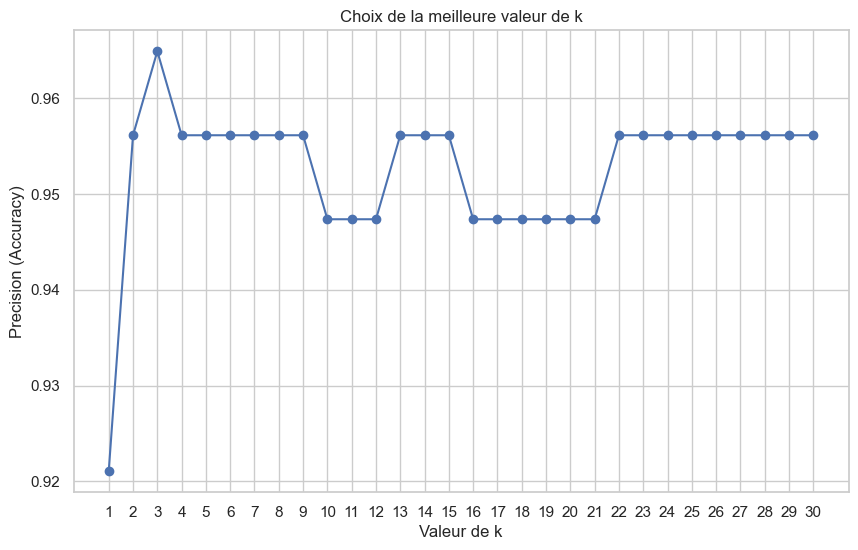

In [52]:
# Affichage du graphique

plt.figure(figsize=(10,6))
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('Valeur de k')
plt.ylabel('Precision (Accuracy)')
plt.title('Choix de la meilleure valeur de k')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [29]:
for k, acc in zip(k_values,accuracies) :
    print(f'k = {k}----> Accuracy = {acc : .2f}')

k = 1----> Accuracy =  0.92
k = 2----> Accuracy =  0.96
k = 3----> Accuracy =  0.96
k = 4----> Accuracy =  0.96
k = 5----> Accuracy =  0.96
k = 6----> Accuracy =  0.96
k = 7----> Accuracy =  0.96
k = 8----> Accuracy =  0.96
k = 9----> Accuracy =  0.96
k = 10----> Accuracy =  0.95
k = 11----> Accuracy =  0.95
k = 12----> Accuracy =  0.95
k = 13----> Accuracy =  0.96
k = 14----> Accuracy =  0.96
k = 15----> Accuracy =  0.96
k = 16----> Accuracy =  0.95
k = 17----> Accuracy =  0.95
k = 18----> Accuracy =  0.95
k = 19----> Accuracy =  0.95
k = 20----> Accuracy =  0.95
k = 21----> Accuracy =  0.95
k = 22----> Accuracy =  0.96
k = 23----> Accuracy =  0.96
k = 24----> Accuracy =  0.96
k = 25----> Accuracy =  0.96
k = 26----> Accuracy =  0.96
k = 27----> Accuracy =  0.96
k = 28----> Accuracy =  0.96
k = 29----> Accuracy =  0.96
k = 30----> Accuracy =  0.96


In [30]:
# remplacons donc k par 4

knn_model = KNeighborsClassifier(n_neighbors=4)
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [31]:
#prediction

y_pred_knn = knn_model.predict(X_test)

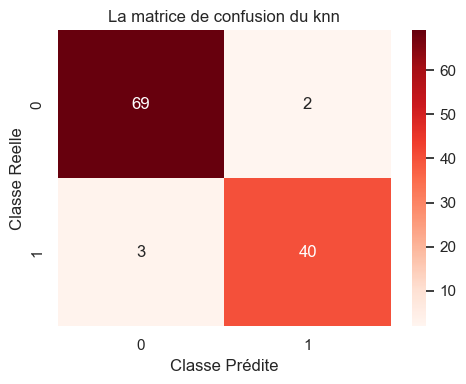

In [49]:
# Evaluation du modele
#Matrice de confusion

cm_knn = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(5,4))
sns.heatmap(cm_knn, fmt='d', annot=True, cmap='Reds')
plt.title('La matrice de confusion du knn')
plt.xlabel('Classe Prédite')
plt.ylabel('Classe Reelle')
plt.tight_layout()
plt.show()
           

## classe 0 (benigne)

- 69 vrais négatifs (TN) : le modèle a bien prédit 69 fois bénigne alors que c’était vraiment bénigne.
- 3 faux négatifs (FN) : le modèle a prédit 3 fois bénigne, alors que c’était maligne → plus dangereux, car une tumeur maligne a été manquée.

## Classe 1 (maligne)

- 40 vrais positifs (TP) : le modèle a bien prédit 40 fois maligne alors que c’était vraiment maligne.
- 2 faux positifs (FP) : le modèle a prédit 2 fois maligne, alors que c’était bénigne → fausse alerte.


In [33]:
#rapport de classification

print('--- Rapport de classification ---: \n', classification_report(y_test,y_pred_knn))

--- Rapport de classification ---: 
               precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



## Classe 0 (bénigne) :

	•	Précision 0.96 :  96% des cas prédits comme bénignes sont effectivement bénignes.
	•	Rappel 0.97 : le modèle a retrouvé 97% de tous les vrais cas bénignes.
	•	Bon équilibre entre les deux.

## Classe 1 (maligne) :

	•	Précision 0.95 : 95% des cas prédits comme malignes sont bien malignes.
	•	Rappel 0.93 : 93% des vraies tumeurs malignes ont été détectées.
	•	F1-score 0.94 montre une performance solide, mais un peu plus faible que pour les cas bénignes.


## Accuracy :

- Accuracy = 0.96 : 95% de bonnes prédictions globalement.

## Forces du modèle :

- Très bonne précision globale (96%)
- Bon équilibre entre les deux classes
- Précision élevée pour les deux types de tumeurs


## Petite faiblesse à surveiller :

- Le rappel pour la classe maligne = 0.93, ce qui veut dire qu’il reste encore quelques tumeurs malignes non détectées.
- Pour une application médicale, minimiser les faux négatifs est crucial.

# Modele SVM

In [34]:
# initialisation du modele SVM (avec un noyau rbf)
# C : controle combien on punit les erreurs pendant l'entrainement
# gamma : controle l'influence d'un point de donnés 

svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)


In [35]:
#ENTRAINEMENT

svm_model.fit(X_train, y_train)

SVC(random_state=42)

In [36]:
#prediction

y_pred_svm = svm_model.predict(X_test)

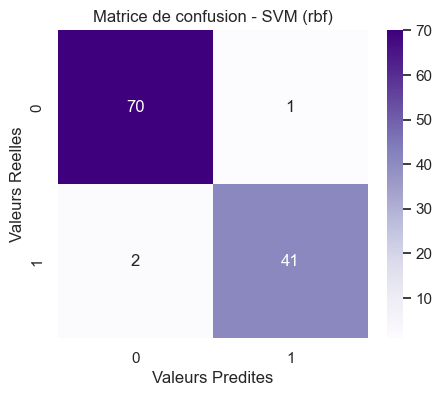

In [38]:
#evaluation du modele

conf_mat = confusion_matrix(y_test,y_pred_svm)

plt.figure(figsize=(5,4))
sns.heatmap(conf_mat, fmt='d', annot=True, cmap='Purples')
plt.title('Matrice de confusion - SVM (rbf)')
plt.xlabel('Valeurs Predites')
plt.ylabel('Valeurs Reelles')
plt.show()

## classe 0 (benigne)

- 70 vrais négatifs (TN) : le modèle a bien prédit 70 fois bénigne alors que c’était vraiment bénigne.
- 2 faux négatifs (FN) : le modèle a prédit 2 fois bénigne, alors que c’était maligne.

## Classe 1 (maligne)

- 41 vrais positifs (TP) : le modèle a bien prédit 41 fois maligne alors que c’était vraiment maligne.
- 1 faux positifs (FP) : le modèle a prédit 1 fois maligne, alors que c’était bénigne.


In [39]:
#rapport de classification

print('--- Rapport de classification --- :\n', classification_report(y_test, y_pred_svm))

--- Rapport de classification --- :
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



## Classe 0 (bénigne)

- Précision 0.97 :  97% des cas prédits comme bénignes sont effectivement bénignes.
- Rappel 0.99 : 99% des cas réellement bénins ont été correctement identifiés.
- Très bon équilibre entre les deux.

## Classe 1 (maligne)

- Précision 0.98 : 98% des prédictions "maligne" étaient correctes.
- Rappel 0.95 : 95% des cas réellement maligne ont été correctement identifiés
- F1-score 0.96 montre une performance solide

## Accuracy :

- Accuracy = 0.97 :  97% de bonnes prédictions globalement.

## Forces du modèle :

- Très bonne précision globale (97%)
- Bon équilibre entre les deux classes
- Précision élevée pour les deux types de tumeurs
- Le modèle est légèrement meilleur pour identifier les cas bénigne (f1-score 0.98) que maligne (f1-score 0.96)


Ce modèle SVM montre de très bonnes capacités de prédiction pour ce problème de classification du cancer du sein.


# Arbre de decision

## Pour l'arbre de decision, on a pas besoin de faire la normalisation

In [40]:
df = pd.read_csv('Dataset_Cancer_Du_Sein.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [41]:
# encodage de nos données categorielle

df['diagnosis'] = df['diagnosis'].replace({'M': 1, 'B': 0})

C:\Users\WINDOWS 10 VPRO\AppData\Local\Temp\ipykernel_7912\1921551492.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['diagnosis'] = df['diagnosis'].replace({'M': 1, 'B': 0})


In [42]:
#creer le modele et l'entrainer

model_tree = DecisionTreeClassifier()
model_tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [43]:
#predicition

y_pred_tree = model_tree.predict(X_test)

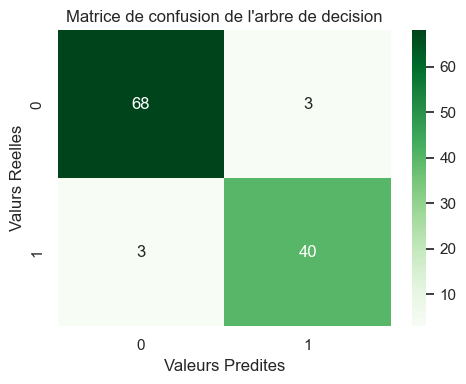

In [50]:
#matrice de confusion

cm_tree = confusion_matrix(y_test,y_pred_tree)

plt.figure(figsize=(5,4))
sns.heatmap(cm_tree, fmt='d', annot=True, cmap='Greens')
plt.title("Matrice de confusion de l\'arbre de decision")
plt.xlabel('Valeurs Predites')
plt.ylabel('Valurs Reelles')
plt.tight_layout()
plt.show()

## classe 0 (benigne)

- 68 vrais négatifs (TN) : le modèle a bien prédit 68 fois bénigne alors que c’était vraiment bénigne.
- 3 faux négatifs (FN) : le modèle a prédit 3 fois bénigne, alors que c’était maligne.

## Classe 1 (maligne)

- 40 vrais positifs (TP) : le modèle a bien prédit 40 fois maligne alors que c’était vraiment maligne.
- 3 faux positifs (FP) : le modèle a prédit 3 fois maligne, alors que c’était bénigne.


In [45]:
#rapport de clasification

print(' Rapport de classification :\n', classification_report(y_test,y_pred_tree))

 Rapport de classification :
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



## Classe 0 (bénigne) :

	•	Précision 0.96 :  96% des cas prédits comme bénignes sont effectivement bénignes.
	•	Rappel 0.96 : le modèle a retrouvé 96% de tous les vrais cas bénignes.
	•	Très bon équilibre entre les deux.

## Classe 1 (maligne) :

	•	Précision 0.93 : 93% des cas prédits comme malignes sont bien malignes.
	•	Rappel 0.93 : 93% des vraies tumeurs malignes ont été détectées.
	•	F1-score 0.93 montre une performance solide, mais un peu plus faible que pour les cas bénignes.


## Accuracy :

- Accuracy = 0.95 → 95% de bonnes prédictions globalement.

## Forces du modèle :

- Très bonne précision globale (95%)
- Bon équilibre entre les deux classes
- Précision élevée pour les deux types de tumeurs


## Petite faiblesse à surveiller :

- Le rappel pour la classe maligne = 0.93, ce qui veut dire qu’il reste encore quelques tumeurs malignes non détectées (faux négatifs).
- Pour une application médicale, minimiser les faux négatifs est crucial.

In [53]:
#Comparaison de la precision globale de nos differents modeles

comparaison = pd.DataFrame({
    'Modeles' : ['Modele Regression Logistique', 'Modele KNN', 'Modele SVM', 'Modele Arbre de decision'],
    'Precision' : [accuracy_score(y_test, y_pred), accuracy_score(y_test, y_pred_knn), accuracy_score(y_test, y_pred_svm), accuracy_score(y_test, y_pred_tree)],
    
})

comparaison

,Modeles,Precision
0,Modele Regression Logistique,0.982456
1,Modele KNN,0.956140
2,Modele SVM,0.973684
3,Modele Arbre de decision,0.947368


# Conclusion du projet

Ce projet sur la Prediction du Cancer du Sein m’a permis de mieux comprendre l’impact des techniques de machine learning dans le domaine de la santé, en particulier pour la détection du cancer du sein, une maladie qui continue de toucher des millions de femmes à travers le monde.

En explorant plusieurs algorithmes de classification, notamment la régression logistique, le KNN, le SVM et l’arbre de décision, j’ai pu évaluer et comparer leurs performances sur des données médicales. 

Après avoir soigneusement nettoyé les données (en remplaçant les valeurs aberrantes plutôt que de les supprimer à cause du petit volume de données), j’ai constaté que la Régression Logistique offrait les meilleures performances, avec un score de précision très élevé (98%).


Mon objectif à travers ce projet était aussi de répondre à un enjeu réel, en apportant une solution technique à un problème de santé publique : améliorer le dépistage du cancer du sein. Un tel modèle, s’il est intégré dans un système clinique, pourrait aider les médecins à repérer plus rapidement les cas à risque et à prioriser les examens complémentaires.

Cependant, il est important de noter que ce type de modèle ne remplace pas le jugement médical. Il doit être vu comme un outil d’aide à la décision, qui vient compléter l’analyse humaine. De plus, l’utilisation d’un dataset relativement petit constitue une limite à la généralisation des résultats : un déploiement en milieu réel nécessiterait plus de données, une validation clinique rigoureuse et la prise en compte de facteurs supplémentaires (âge, antécédents médicaux, imagerie, etc.).

En conclusion, ce projet montre que l’intelligence artificielle, lorsqu’elle est bien appliquée, peut améliorer la précision et la rapidité des diagnostics dans des domaines sensibles comme l’oncologie. C’est une piste prometteuse pour le futur de la médecine.